## Problem Statement:
A bank wants to classify whether customers will subscribe to a term deposit based on various features like age, job, marital status, education, and contact details.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
df = pd.read_csv(r"E:\PGDA 41\Machine Learning\assignment 2\Bank Customer Classification\bank_customer_classification.csv")
df.head()

,Age,Balance,Salary,Tenure,Num_Products,Credit_Score,Gender,Exited
0,1.691954,0.330291,-2.488562,-4.181512,-1.940913,0.071408,Male,1
1,1.053366,-1.805557,1.373808,1.427951,-1.535227,2.862033,Female,1
2,1.058554,2.479389,2.267180,1.726136,0.770036,2.227351,Male,1
3,0.874749,-1.256761,0.585491,0.930555,-0.428907,-1.354450,Female,0
4,-1.758828,1.516813,0.357838,1.389580,2.209015,-0.061048,Male,1


In [6]:
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])

In [8]:
X = df.drop("Exited", axis=1)
y = df["Exited"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [14]:
y_pred = model.predict(X_test)

In [16]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.77

Confusion Matrix:
 [[37 12]
 [11 40]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.76      0.76        49
           1       0.77      0.78      0.78        51

    accuracy                           0.77       100
   macro avg       0.77      0.77      0.77       100
weighted avg       0.77      0.77      0.77       100



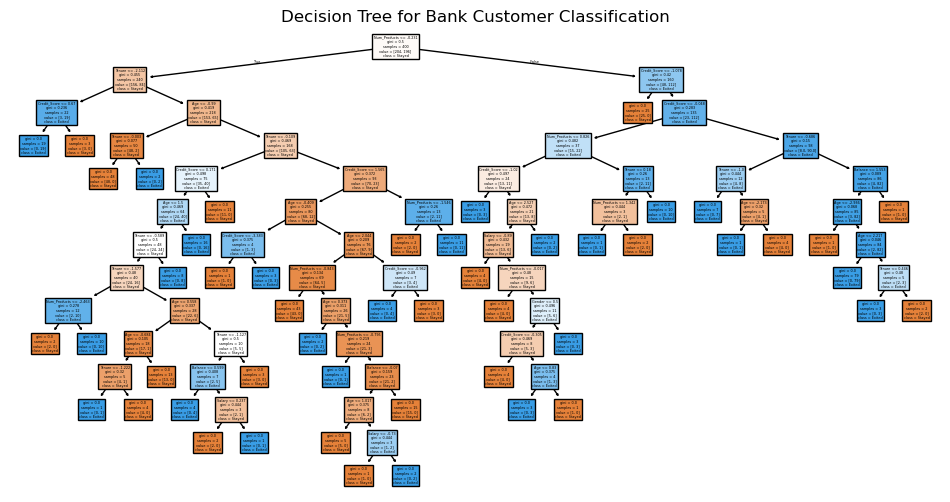

In [18]:
plt.figure(figsize=(12, 6))
plot_tree(model, feature_names=X.columns, class_names=["Stayed", "Exited"], filled=True)
plt.title("Decision Tree for Bank Customer Classification")
plt.show()